<a href="https://colab.research.google.com/github/Dhanalaxmi3103/BharatIntern/blob/DataScience/Task_2_Titanic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd

In [ ]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data.shape

(891, 12)

In [ ]:
test_data.shape

(418, 11)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
test_data.isnull().sum()
test_data['Survived']=""
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,


In [ ]:
VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
def bar_graph(feature):
  survival=train_data[train_data['Survived']==1][feature].value_counts()
  deaths=train_data[train_data['Survived']==0][feature].value_counts()
  frame=pd.DataFrame([survival,deaths])
  frame.index=['Survived','Dead']
  frame.plot(kind='bar',stacked=True,figsize=(5,5))

Survived:
 Sex
female    233
male      109
Name: count, dtype: int64
Dead:
 Sex
male      468
female     81
Name: count, dtype: int64


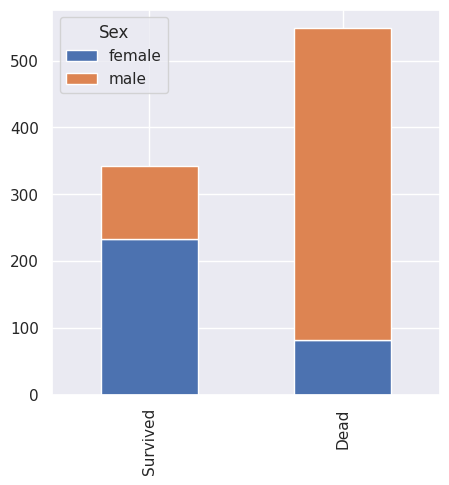

In [ ]:
bar_graph('Sex')
print("Survived:\n",train_data[train_data['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['Sex'].value_counts())


Survived:
 Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Dead:
 Pclass
3    372
2     97
1     80
Name: count, dtype: int64


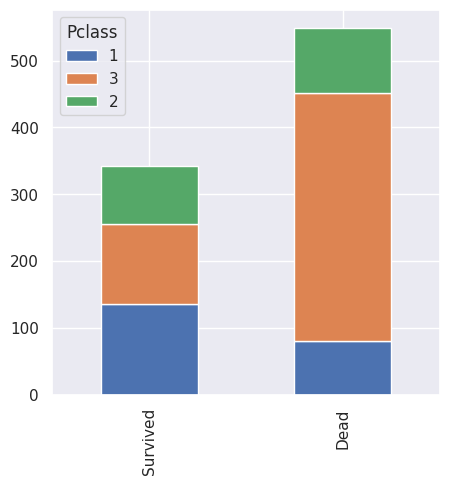

In [ ]:
bar_graph("Pclass")
print("Survived:\n",train_data[train_data['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['Pclass'].value_counts())


Survived:
 SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64
Dead:
 SibSp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: int64


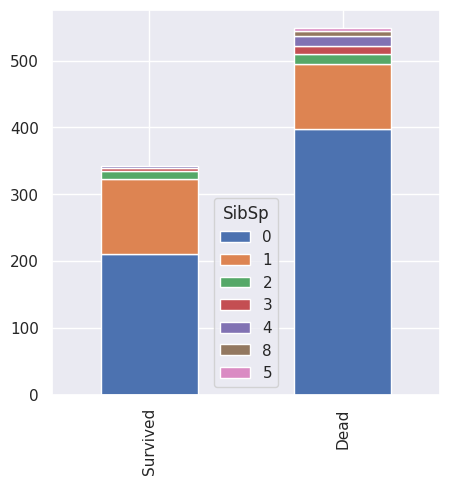

In [ ]:
bar_graph('SibSp')
print("Survived:\n",train_data[train_data['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['SibSp'].value_counts())


Survived:
 Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64
Dead:
 Parch
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: count, dtype: int64


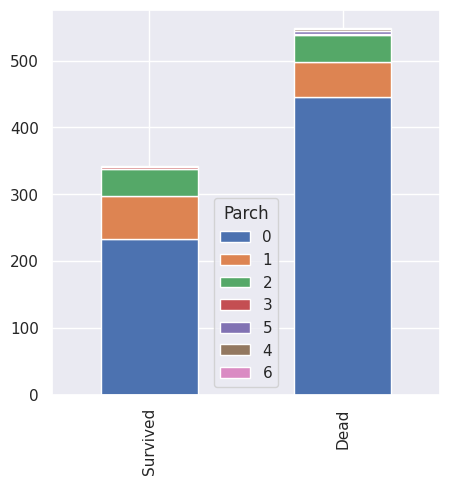

In [ ]:
bar_graph('Parch')
print("Survived:\n",train_data[train_data['Survived']==1]['Parch'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['Parch'].value_counts())


Survived:
 Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
Dead:
 Embarked
S    427
C     75
Q     47
Name: count, dtype: int64


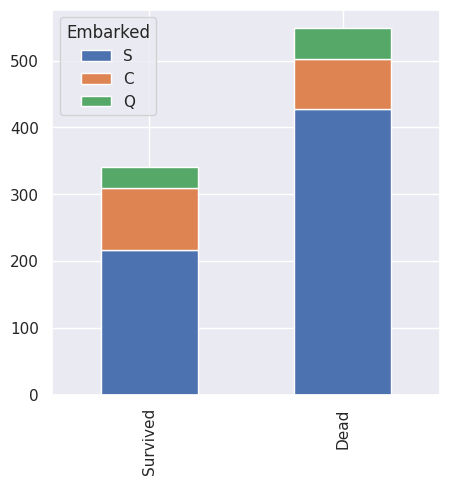

In [ ]:
bar_graph("Embarked")
print("Survived:\n",train_data[train_data['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train_data[train_data['Survived']==0]['Embarked'].value_counts())


In [ ]:
#combinig dataset
train_and_test=[train_data,test_data]

for data in train_and_test:
  data['Title']=data['Name'].str.extract('([A-Za-z]+)\.',expand=False)



In [ ]:
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [ ]:
test_data['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [ ]:
#title map
map_title={'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Col':3,'Rev':3,
           'Mlle':3,'Ms':3,'Dr':3,'Dona':3,'Major':3,'Lady':3,
           'Sir':3,'Mme':3,'Don':3,'Countess':3,'capt':3,'Jonkheer':3}


In [ ]:
train_data=train_data.fillna({'Title':3})
test_data=test_data.fillna({'Title':3})

In [ ]:
for data in train_and_test:
  data['Title']=data['Title'].map(map_title)

In [ ]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,,NaN,0.0
1,893,3,1,3.0,1,0,363272,0.0,0.8,0,,NaN,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,,NaN,0.0
3,895,3,0,2.0,0,0,315154,0.0,0.8,0,,NaN,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,,NaN,0.8


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,,2


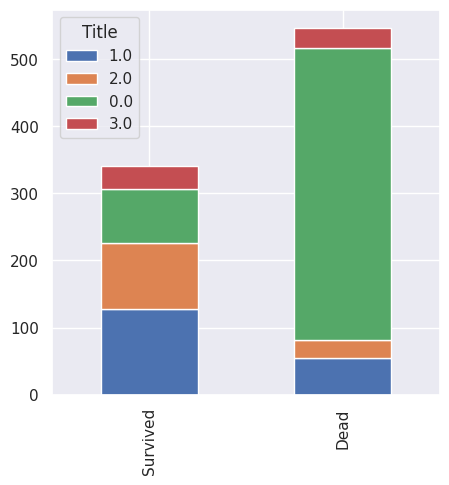

In [ ]:
bar_graph('Title')

In [ ]:
#deletin unneccesary feature from dataset i.e Name coulmn
train_data.drop('Name',axis=1,inplace=True)
test_data.drop('Name',axis=1,inplace=True)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
train_data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0


In [ ]:
#mapping sex
map_sex={'male':0,'female':1}
for data in train_and_test:
  data['Sex']=data['Sex'].map(map_sex)

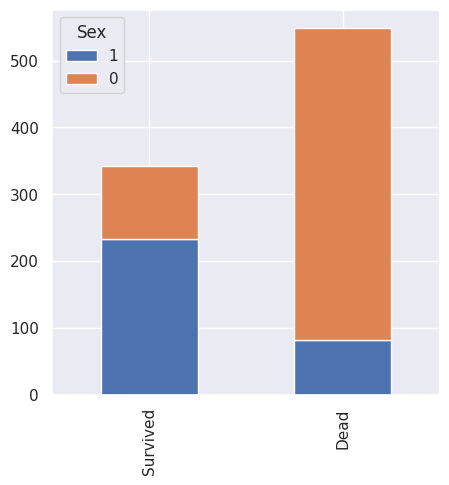

In [ ]:
bar_graph('Sex')

In [ ]:
 train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
train_data['Age'].fillna(train_data.groupby("Title")['Age'].transform('median'),inplace=True)
test_data['Age'].fillna(train_data.groupby("Title")['Age'].transform('median'),inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


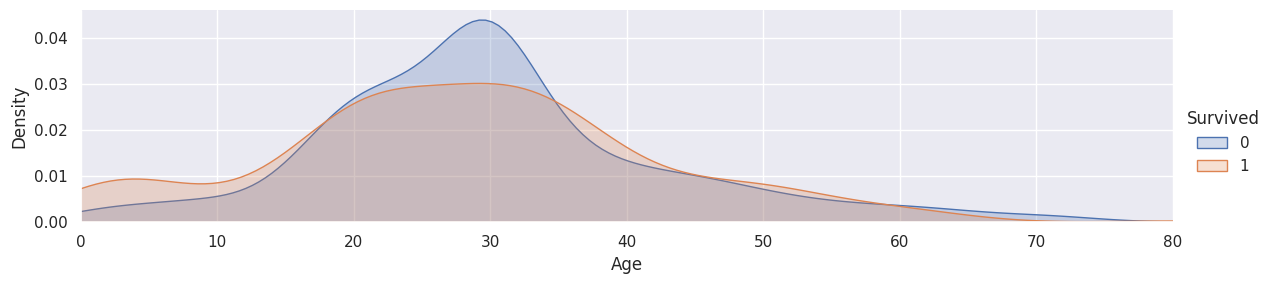

In [ ]:
pack=sns.FacetGrid(train_data,hue='Survived',aspect=4)
pack.map(sns.kdeplot,'Age',shade=True)
pack.set(xlim=(0,train_data['Age'].max()))
pack.add_legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(10.0, 50.0)

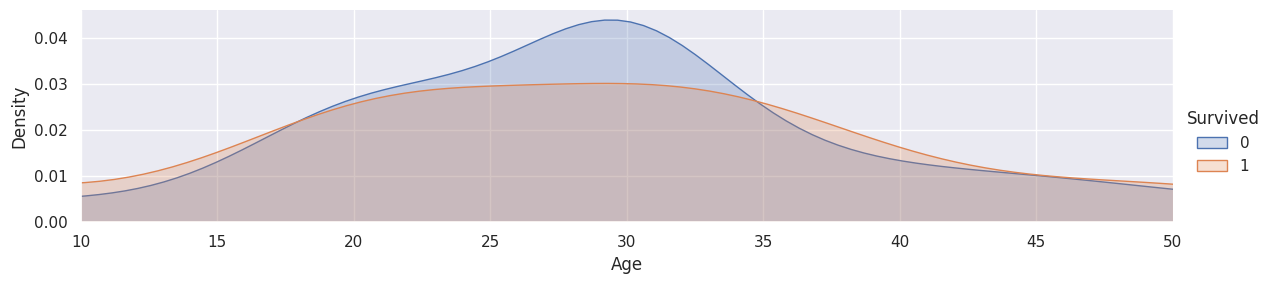

In [ ]:
pack=sns.FacetGrid(train_data,hue='Survived',aspect=4)
pack.map(sns.kdeplot,'Age',shade=True)
pack.set(xlim=(0,train_data['Age'].max()))
pack.add_legend()
plt.xlim(10,50)

In [ ]:
print("*****Train data information*****")
train_data.info()
print("\n****Test data information******")
test_data.info()

*****Train data information*****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        888 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB

****Test data information******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -------------

In [ ]:
#Consrting numerical age to categorical variable
for data in train_and_test:
  data.loc[data['Age']<=16,'Age']=0
  data.loc[(data['Age']>16) & (data['Age']<=26),'Age']=1
  data.loc[(data['Age']>26) & (data['Age']<=36),'Age']=2
  data.loc[(data['Age']>36) & (data['Age']<=62),'Age']=3
  data.loc[data['Age']>62,'Age']=4


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


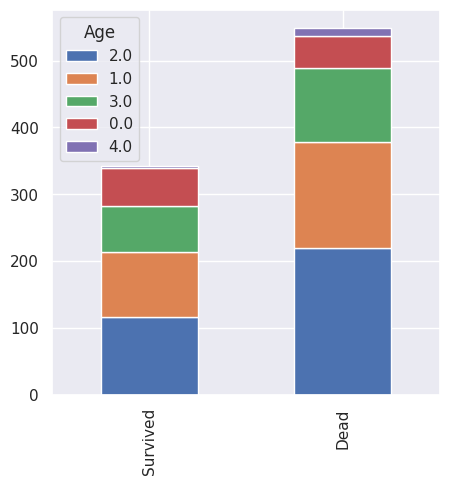

In [ ]:
bar_graph('Age')

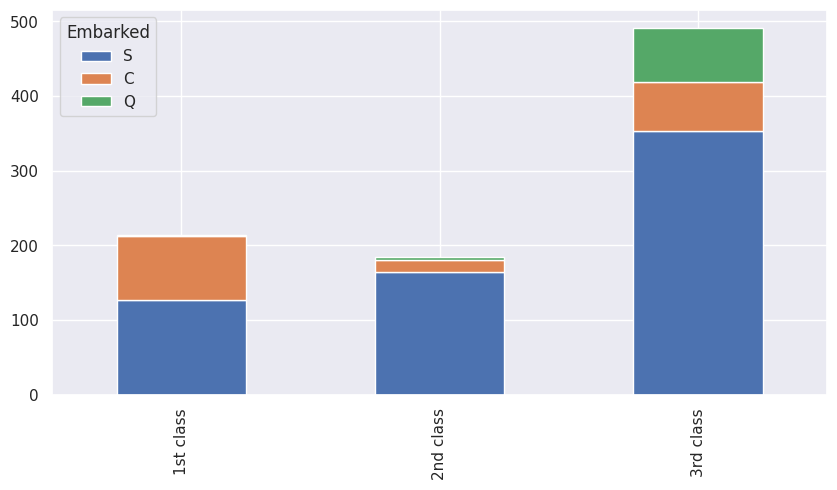

Pclass1:
 Embarked
S    127
C     85
Q      2
Name: count, dtype: int64
Pclass2:
 Embarked
S    164
C     17
Q      3
Name: count, dtype: int64
Pclass3:
 Embarked
S    353
Q     72
C     66
Name: count, dtype: int64


In [ ]:
Pclass1=train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2=train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3=train_data[train_data['Pclass']==3]['Embarked'].value_counts()
ds=pd.DataFrame([Pclass1,Pclass2,Pclass3])
ds.index=['1st class','2nd class','3rd class']
ds.plot(kind='bar',stacked=True,figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)

In [ ]:
for data in train_and_test:
  data['Embarked']=data['Embarked'].fillna('S')

In [ ]:
#mapping Embarked column
map_embarked={'S':0,'C':1,'Q':2}
for data in train_and_test:
  data['Embarked']=data['Embarked'].map(map_embarked)

In [ ]:
train_data.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0


In [ ]:
train_data['Fare'].fillna(train_data.groupby('Pclass')['Fare'].transform("median"),inplace=True)
test_data['Fare'].fillna(train_data.groupby('Pclass')['Fare'].transform("median"),inplace=True)
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0.0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0.0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0.0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3.0
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2.0
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2.0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


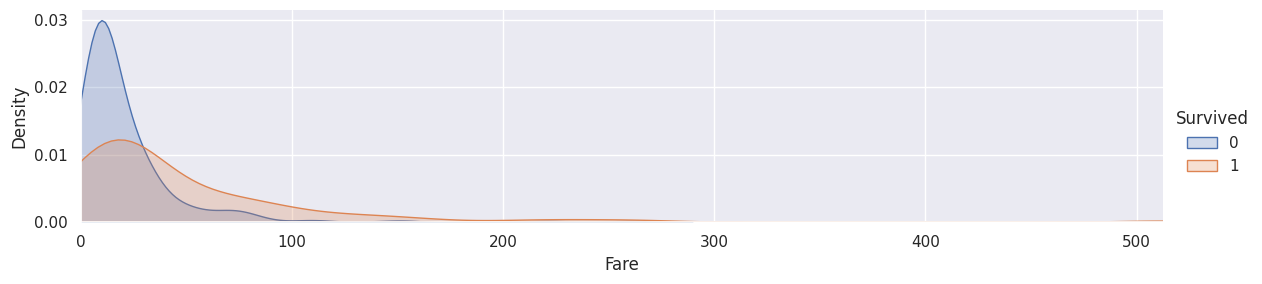

In [ ]:
pack1=sns.FacetGrid(train_data,hue='Survived',aspect=4)
pack1.map(sns.kdeplot,'Fare',shade=True)
pack1.set(xlim=(0,train_data['Fare'].max()))
pack1.add_legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 50.0)

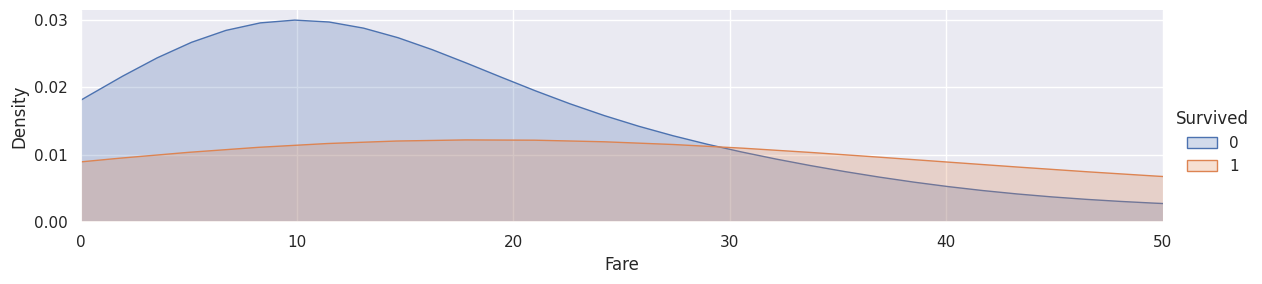

In [ ]:
pack1=sns.FacetGrid(train_data,hue='Survived',aspect=4)
pack1.map(sns.kdeplot,'Fare',shade=True)
pack1.set(xlim=(0,train_data['Fare'].max()))
pack1.add_legend()
plt.xlim(0,50)

In [ ]:
for data in train_and_test:
  data.loc[data['Fare']<=17,'Fare']=0
  data.loc[(data['Fare']>17) & (data['Fare']<=30),'Fare']=1
  data.loc[(data['Fare']>30) & (data['Fare']<=100),'Fare']=2
  data.loc[data['Fare']>=100,'Fare']=3

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0.0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1.0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2.0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0.0


In [ ]:
train_data.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [ ]:
for data in train_and_test:
  data['Cabin']=data['Cabin'].str[ :1]


<Axes: >

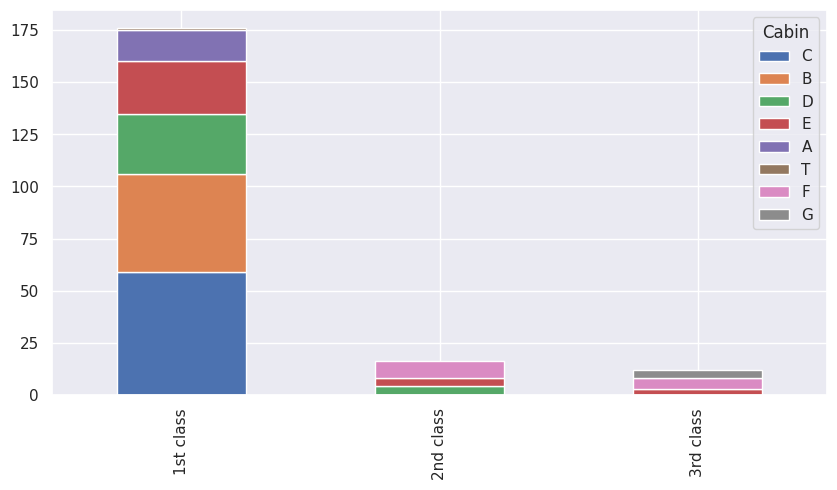

In [ ]:
class1=train_data[train_data['Pclass']==1]['Cabin'].value_counts()
class2=train_data[train_data['Pclass']==2]['Cabin'].value_counts()
class3=train_data[train_data['Pclass']==3]['Cabin'].value_counts()
da=pd.DataFrame([class1,class2,class3])
da.index=['1st class','2nd class','3rd class']
da.plot(kind='bar',stacked=True,figsize=(10,5))


In [ ]:
map_cabin={'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for data in train_and_test:
  data['Cabin']=data['Cabin'].map(map_cabin)


In [ ]:
train_data['Cabin'].fillna(train_data.groupby("Pclass")['Cabin'].transform("median"),inplace=True)
test_data['Cabin'].fillna(train_data.groupby("Pclass")['Cabin'].transform("median"),inplace=True)

In [ ]:
train_data['FamilySize']=train_data['SibSp']+train_data['Parch']+1
test_data['FamilySize']=test_data['SibSp']+test_data['Parch']+1

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 11.0)

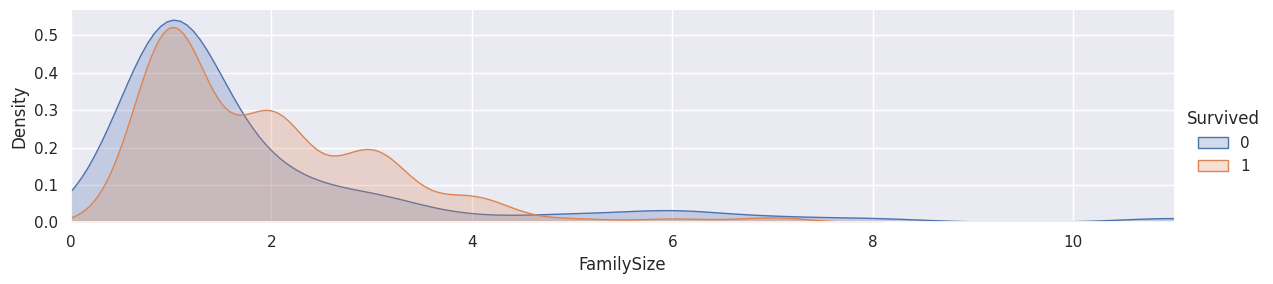

In [ ]:
pack2=sns.FacetGrid(train_data,hue='Survived',aspect=4)
pack2.map(sns.kdeplot,'FamilySize',shade=True)
pack2.set(xlim=(0,train_data['FamilySize'].max()))
pack2.add_legend()
plt.xlim(0)

In [ ]:
map_family={1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for data in train_and_test:
  data['FamilySize']=data['FamilySize'].map(map_family)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2.0,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1.0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2.0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0,0.0


In [ ]:
drop_features=['Ticket','SibSp','Parch']
train_data=train_data.drop(drop_features,axis=1)
test_data=test_data.drop(drop_features,axis=1)
train_data=train_data.drop(['PassengerId'],axis=1)

In [ ]:
training_data=train_data.drop(['Survived',],axis=1)
target=train_data['Survived']
training_data.shape,target.shape

((891, 8), (891,))

In [ ]:
training_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,1.0,0.0,2.0,0,0.4
1,1,1,3.0,2.0,0.8,1,0.4
2,3,1,1.0,0.0,2.0,0,0.0
3,1,1,2.0,2.0,0.8,0,0.4
4,3,0,2.0,0.0,2.0,0,0.0
5,3,0,2.0,0.0,2.0,2,0.0
6,1,0,3.0,2.0,1.6,0,0.0
7,3,0,0.0,1.0,2.0,0,1.6
8,3,1,2.0,0.0,2.0,0,0.8
9,2,1,0.0,2.0,1.8,1,0.4


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Cabin       891 non-null    float64
 6   Embarked    891 non-null    int64  
 7   Title       888 non-null    float64
 8   FamilySize  891 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 62.8 KB


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Cabin       891 non-null    float64
 5   Embarked    891 non-null    int64  
 6   FamilySize  891 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 48.9 KB


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=0)


In [ ]:
cas=DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(cas,training_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.76666667 0.80898876 0.7752809  0.7752809  0.88764045 0.76404494
 0.82022472 0.82022472 0.74157303 0.79775281]


In [ ]:
models=[KNeighborsClassifier(n_neighbors=15),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=15),
        GaussianNB(),SVC(),ExtraTreeClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

def model_fit():
  scoring='accuracy'
  for i in range(len(models)):
    score=cross_val_score(models[i],training_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
    print ("Score of Model",models[i],'is',round(np.mean(score)*100,2),       '\n')

model_fit()

Score of Model KNeighborsClassifier(n_neighbors=15) is 81.37 

Score of Model DecisionTreeClassifier() is 79.91 

Score of Model RandomForestClassifier(n_estimators=15) is 81.38 

Score of Model GaussianNB() is 78.78 

Score of Model SVC() is 83.5 

Score of Model ExtraTreeClassifier() is 78.12 

Score of Model BaggingClassifier() is 81.26 

Score of Model ExtraTreesClassifier() is 80.81 



In [ ]:
model2=SVC()
model2.fit(training_data,target)
test_data
testing_data=test_data.drop(["Survived",'PassengerId'],axis=1)
prediction=model2.predict(testing_data)

In [ ]:
testing_data['Survived']=prediction
submit=pd.DataFrame(test_data['PassengerId'],testing_data['Survived'])
submit.to_csv("Submit.csv")

In [ ]:
model3=RandomForestClassifier()
model3.fit(training_data,target)
test_data
testing_data=test_data.drop(['Survived','PassengerId'],axis=1)
prediction2=model3.predict(testing_data)


In [ ]:
testing_data['Survived']=prediction2
output=pd.DataFrame(test_data['PassengerId'],testing_data['Survived'])
output.to_csv("Output.csv")